# Описание ноутбука
Разномастное тестирование идей, и попытки изобразить что-нибудь дельное

# Todo
* Вместо сумм частот определять средние частот

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import pylab
import scipy as sp
from scipy.sparse import csc_matrix, csr_matrix, load_npz, save_npz, issparse
from scipy import absolute
from chord_scripts import plot_spectrogram

In [251]:
def plot_frequencies(datas, title=None, figsize=(15, 7.5), colors=None, labels=None):
    plt.figure(figsize=figsize)
    for idx, data in enumerate(datas):
        if issparse(data):
            data = sp.absolute(data.toarray()[:,0])
        color = colors[idx] if colors else 'b'
        label = labels[idx] if labels else ''
        plt.plot(range(len(data)), data, color, label=label)
    plt.xscale('log')
    pylab.title(title, fontdict={'fontsize':24})
    pylab.xlabel("Freqs")
    pylab.ylabel('Values')
    plt.legend()
    plt.show()

# Задача: найти метрики для сравнения спектрограмм

Требование к метрике f (для типов аккордов):
* Расстояние между аккордами с одинаковыми типами ~ 0, e.g. $$f(a, b)~=0, при \ a=b  $$
* Расстояние между аккордами разных типов ~ $\inf$ $$f(a,b) ~= \inf, при \ a \neq b$$

## Придумаем метрику на аккордах A:min, A:maj, N

In [92]:
def load_chords(name,num):
    return [absolute(load_npz('../chords/{}/{}.npz'.format(name,idx)).tocsr()) for idx in range(num)]

In [93]:
Amajs = load_chords('A_maj',126)

In [94]:
Amins = load_chords('A_min',126)

In [95]:
Nons = load_chords('N',126)

Далее вычисляются суммы активностей частот в каждом аккорде

In [199]:
%%time
maj_sums = np.array([[np.sum(chord[i,:]) for i in range(chord.shape[0])] for chord in Amajs[:20]])

CPU times: user 2.67 s, sys: 0 ns, total: 2.67 s
Wall time: 2.68 s


In [200]:
%%time
min_sums = np.array([[np.sum(chord[i,:]) for i in range(chord.shape[0])] for chord in Amins[:20]])

CPU times: user 2.55 s, sys: 8 ms, total: 2.56 s
Wall time: 2.56 s


In [201]:
%%time
non_sums = np.array([[np.sum(chord[i,:]) for i in range(chord.shape[0])] for chord in Nons[:20]])

CPU times: user 2.39 s, sys: 20 ms, total: 2.41 s
Wall time: 2.4 s


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


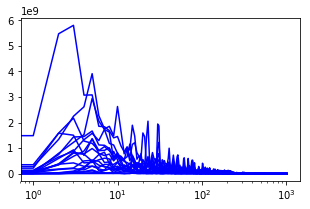

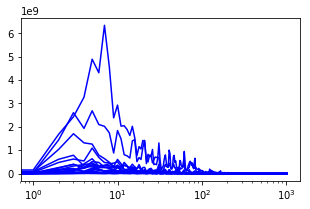

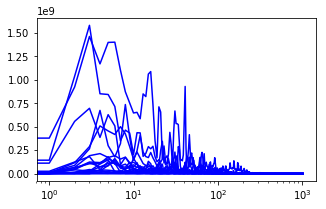

In [202]:
plot_frequencies(maj_sums, figsize=(5,3))
plot_frequencies(min_sums, figsize=(5,3))
plot_frequencies(non_sums, figsize=(5,3))

Нормализация сумм

In [203]:
maj_sums_norm = np.array([s/np.sum(s) for s in maj_sums])
min_sums_norm = np.array([s/np.sum(s) for s in min_sums])
non_sums_norm = np.array([s/np.sum(s) for s in non_sums])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Средние ненормализованных сумм частот

In [277]:
maj_avg = np.array([np.average(maj_sums[:,f]) for f in range(1025)])
min_avg = np.array([min_sums[:,f].sum() for f in range(1025)])
non_avg = np.array([non_sums[:,f].sum() for f in range(1025)])

AttributeError: 'numpy.ndarray' object has no attribute 'avg'

Средние нормализованных сумм частот

In [219]:
maj_avg_norm = np.array([maj_sums_norm[:,f].sum() for f in range(1025)])
min_avg_norm = np.array([min_sums_norm[:,f].sum() for f in range(1025)])
non_avg_norm = np.array([non_sums_norm[:,f].sum() for f in range(1025)])

In [275]:
non_sums_norm[:,0]

array([  2.32826373e-03,   0.00000000e+00,   3.45079446e-05,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.74093091e-03,   4.91823856e-03,   7.14096463e-03,
         7.64722919e-03,   5.22974248e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   3.33782207e-02,   9.76091918e-02,
         1.27906997e-04,              nan])

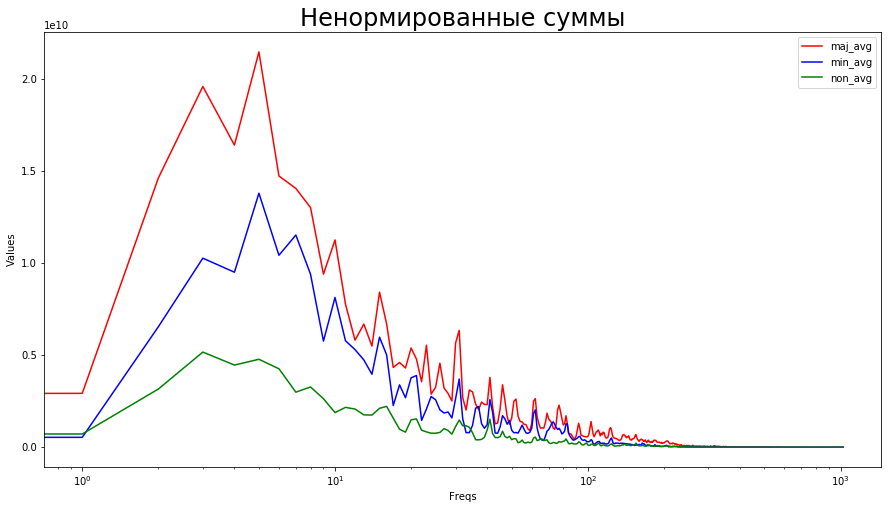

In [254]:
plot_frequencies([maj_avg, min_avg, non_avg], figsize=(15,8), colors=['r','b', 'g'], 
                 labels=['maj_avg', 'min_avg','non_avg'], title='Ненормированные суммы')
#plot_frequencies([np.log(maj_avg)] )
#plot_frequencies([maj_sums[0]], figsize=(15,5))

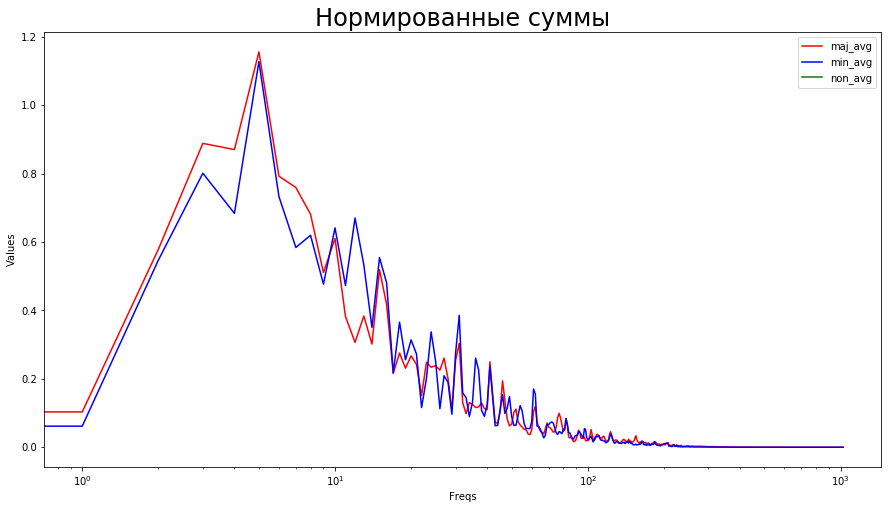

In [255]:
plot_frequencies([maj_avg_norm, min_avg_norm, non_avg_norm], figsize=(15,8), colors=['r','b', 'g'],
                 labels=['maj_avg', 'min_avg','non_avg'], title='Нормированные суммы')

In [272]:
non_avg_norm

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


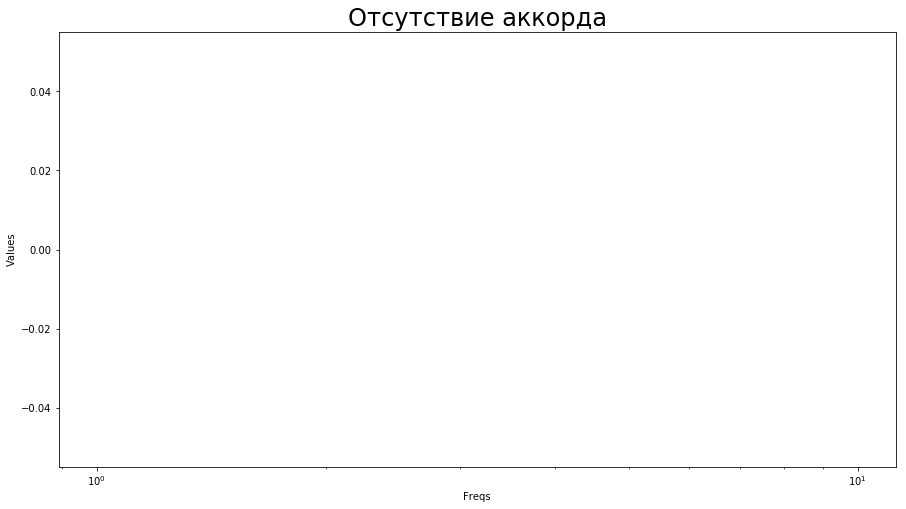

In [271]:
plot_frequencies([non_avg_norm],figsize=(15,8), title='Отсутствие аккорда')

In [268]:
[np.average(np.vstack([maj_avg_norm,min_avg_norm])[:,f]) for f in range(1025)]

[0.017764794329933279,
 0.082454143668101706,
 0.56275151819236924,
 0.8449267718375868,
 0.77714394614796545,
 1.1417991711710695,
 0.76269550319827761,
 0.6718633513871286,
 0.65063587255794397,
 0.49364915133642695,
 0.62599633170288316,
 0.42757812332244516,
 0.48841836997701965,
 0.45855904303646244,
 0.3260174162477778,
 0.53679492440790877,
 0.4490963444227557,
 0.21666581721683781,
 0.32065225361503624,
 0.2435532483722907,
 0.29052303188766337,
 0.25746179563595134,
 0.13371272063158232,
 0.22488789889048644,
 0.2857002110793268,
 0.24524605993276805,
 0.16917297032145984,
 0.234744351497786,
 0.19478981369033457,
 0.10286205370209667,
 0.26515689490286259,
 0.34477940149849218,
 0.14435374090386927,
 0.12171300216289244,
 0.11009607590008001,
 0.1287260148070693,
 0.18833733681042714,
 0.17191047097593257,
 0.11886640265707235,
 0.10162765062234594,
 0.11794094727061079,
 0.24307079586032343,
 0.15460987990816985,
 0.068007132144224325,
 0.066658664261124129,
 0.1070500280568